<a href="https://colab.research.google.com/github/naruto1206/Homework-CNN-AI/blob/main/CNN_10_FOODS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:

import cv2
import numpy as np
import pandas as pd
import seaborn as ses
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score,recall_score,confusion_matrix,classification_report,accuracy_score,f1_score
from keras.layers import Dense, Activation, Dropout, BatchNormalization, LSTM,Conv2D, MaxPooling2D, Flatten
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical ,load_img, img_to_array
from tensorflow.keras.optimizers import RMSprop,SGD
from tensorflow.keras.models import load_model
from keras import callbacks
from keras.callbacks import EarlyStopping,ReduceLROnPlateau
import matplotlib.pyplot as plt
from matplotlib.image import imread

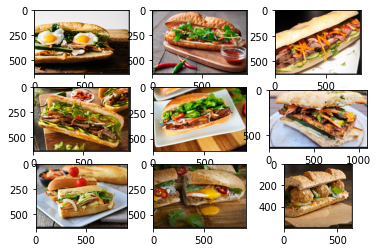

In [6]:

folder = '/content/drive/MyDrive/Colab Notebooks/Data-10-foods/train/banhmi/'
for i in range(9):
  plt.subplot(330+i+1)
  filename = folder + 'banhmi' + str(i) + '.jpg'
  image = imread(filename)
  plt.imshow(image)
plt.show()

In [8]:
image_generator = ImageDataGenerator(rescale=1./255, validation_split=0.2) 

train_dataset = image_generator.flow_from_directory(batch_size=10,
                                                 directory='/content/drive/MyDrive/Colab Notebooks/Data-10-foods/train/',
                                                 shuffle=True,
                                                 target_size=(200, 200), 
                                                 subset="training",
                                                 class_mode='categorical')

validation_dataset = image_generator.flow_from_directory(batch_size=10,
                                                 directory='/content/drive/MyDrive/Colab Notebooks/Data-10-foods/validation/',
                                                 shuffle=True,
                                                 target_size=(200, 200), 
                                                 subset="validation",
                                                 class_mode='categorical')

Found 240 images belonging to 10 classes.
Found 20 images belonging to 10 classes.


In [10]:
model = Sequential()
model.add(Conv2D(32,(3,3), activation='relu',kernel_initializer='he_uniform',padding='same',input_shape=(200,200,3)))
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3), activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3), activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D(2,2))

model.add(Flatten())
model.add(Dense(128, activation = 'relu', kernel_initializer='he_uniform'))
model.add(Dense(128, activation = 'relu', kernel_initializer='he_uniform'))
model.add(Dense(128, activation = 'relu', kernel_initializer='he_uniform'))
model.add(Dense(128, activation = 'relu', kernel_initializer='he_uniform'))
model.add(Dense(10,activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

In [ ]:
# df["category"] = df["category"].replace({0:'pho',1:'banhmi',2:'banhxeo',3:'buncha',4:'bunrieu',5:'chetroinuoc',6:'gakho',7:'goicuon',8:'miquang',9:'thitkho'})
# train_df,validate_df = train_test_split(df,test_size=0.20, random_state=42)
# train_df = train_df.reset_index(drop=True)
# validate_df = validate_df.reset_index(drop=True)
# total_train=train_df.shape[0]
# total_validate=validate_df.shape[0]
# batch_size=15

In [11]:
history=model.fit(train_dataset,batch_size=125,epochs=20,verbose=1,
                  validation_data=validation_dataset)

Epoch 1/20
24/24 [==============================] - 73s 3s/step - loss: 5.5481 - accuracy: 0.0917 - val_loss: 2.2949 - val_accuracy: 0.1000
Epoch 2/20
24/24 [==============================] - 64s 3s/step - loss: 2.3049 - accuracy: 0.1250 - val_loss: 2.3016 - val_accuracy: 0.1000
Epoch 3/20
24/24 [==============================] - 64s 3s/step - loss: 2.3052 - accuracy: 0.1000 - val_loss: 2.3011 - val_accuracy: 0.1000
Epoch 4/20
24/24 [==============================] - 64s 3s/step - loss: 2.2950 - accuracy: 0.1000 - val_loss: 2.3153 - val_accuracy: 0.0500
Epoch 5/20
24/24 [==============================] - 64s 3s/step - loss: 2.2134 - accuracy: 0.2125 - val_loss: 2.4088 - val_accuracy: 0.1000
Epoch 6/20
24/24 [==============================] - 64s 3s/step - loss: 1.8448 - accuracy: 0.3542 - val_loss: 3.4187 - val_accuracy: 0.1500
Epoch 7/20
24/24 [==============================] - 64s 3s/step - loss: 1.2797 - accuracy: 0.6167 - val_loss: 4.7206 - val_accuracy: 0.0500
Epoch 8/20
24/24 [==

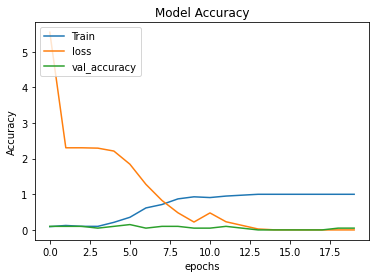

In [13]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epochs')
plt.legend(['Train','loss','val_accuracy'],loc='upper left')
plt.show()

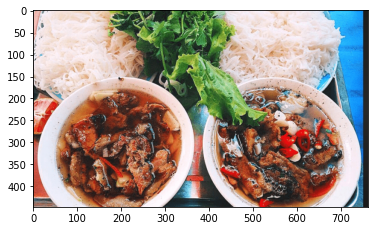

Day la bun cha


In [18]:
filename = '/content/drive/MyDrive/Colab Notebooks/Data-10-foods/validation/buncha/buncha8.jpg'  

img = mpimg.imread(filename)
imgplot = plt.imshow(img)
plt.show()

img = load_img(filename,target_size = (200,200))
img = img_to_array(img)
img =  img.reshape(1,200,200,3)
img = img.astype('float32')
img = img/255
kq = np.argmax(model.predict(img),axis= -1)
if kq==0:
  print('Day la Pho')
elif kq ==1:
  print('Day la banh mi')
elif kq ==2:
  print('Day la banh xeo')
elif kq ==3:
  print('Day la bun cha')
elif kq ==4:
  print('Day la bun rieu')
elif kq ==5:
  print('Day la che troi nuoc')
elif kq ==6:
  print('Day la ga kho')
elif kq ==7:
  print('Day la goi cuon')
elif kq ==8:
  print('Day la mi quang')
elif kq ==9:
  print('Day la thit kho')

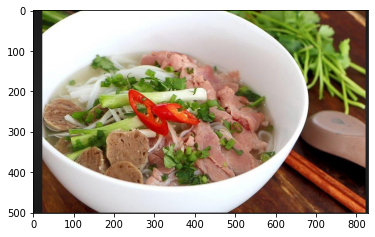

Day la Pho


In [22]:
filename = '/content/drive/MyDrive/Colab Notebooks/Data-10-foods/validation/Pho/pho3.jpg'  

img = mpimg.imread(filename)
imgplot = plt.imshow(img)
plt.show()

img = load_img(filename,target_size = (200,200))
img = img_to_array(img)
img =  img.reshape(1,200,200,3)
img = img.astype('float32')
img = img/255
kq = np.argmax(model.predict(img),axis= -1)
if kq==0:
  print('Day la Pho')
elif kq ==1:
  print('Day la banh mi')
elif kq ==2:
  print('Day la banh xeo')
elif kq ==3:
  print('Day la bun cha')
elif kq ==4:
  print('Day la bun rieu')
elif kq ==5:
  print('Day la che troi nuoc')
elif kq ==6:
  print('Day la ga kho')
elif kq ==7:
  print('Day la goi cuon')
elif kq ==8:
  print('Day la mi quang')
elif kq ==9:
  print('Day la thit kho')

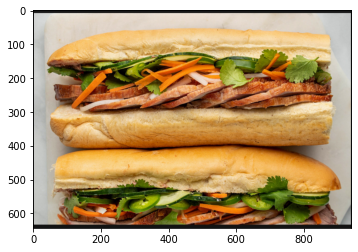

Day la banh mi


In [28]:
filename = '/content/drive/MyDrive/Colab Notebooks/Data-10-foods/validation/banhmi/banhmi6.jpg'  

img = mpimg.imread(filename)
imgplot = plt.imshow(img)
plt.show()

img = load_img(filename,target_size = (200,200))
img = img_to_array(img)
img =  img.reshape(1,200,200,3)
img = img.astype('float32')
img = img/255
kq = np.argmax(model.predict(img),axis= -1)
if kq==0:
  print('Day la Pho')
elif kq ==1:
  print('Day la banh mi')
elif kq ==2:
  print('Day la banh xeo')
elif kq ==3:
  print('Day la bun cha')
elif kq ==4:
  print('Day la bun rieu')
elif kq ==5:
  print('Day la che troi nuoc')
elif kq ==6:
  print('Day la ga kho')
elif kq ==7:
  print('Day la goi cuon')
elif kq ==8:
  print('Day la mi quang')
elif kq ==9:
  print('Day la thit kho')